In [22]:
import pickle
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import numpy as np
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress
import numpy as np
import matplotlib.cm as cm
from scipy import constants
import pandas as pd
from matplotlib import rc
import matplotlib
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams.update({'font.size': 22})
plt.ioff()
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 9 and height to 9
fig_size[1] = 9
fig_size[0] = 9
markersize = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


In [23]:
### Import rms maps


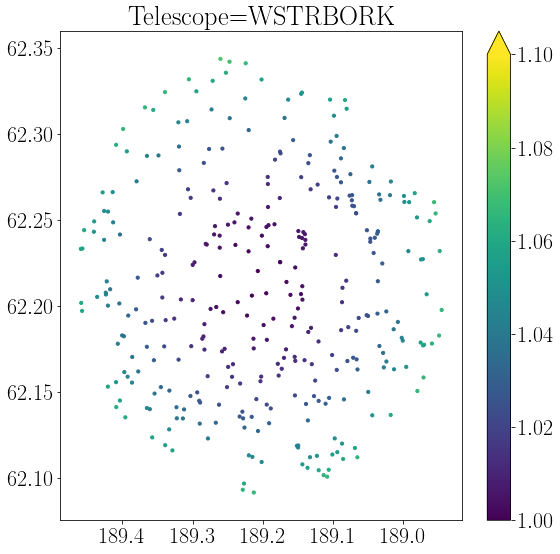

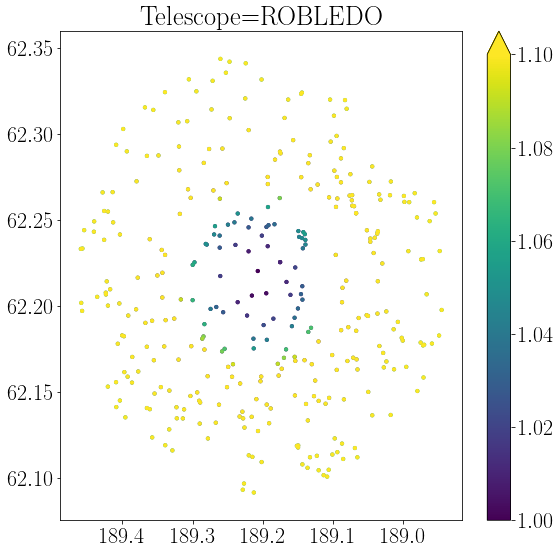

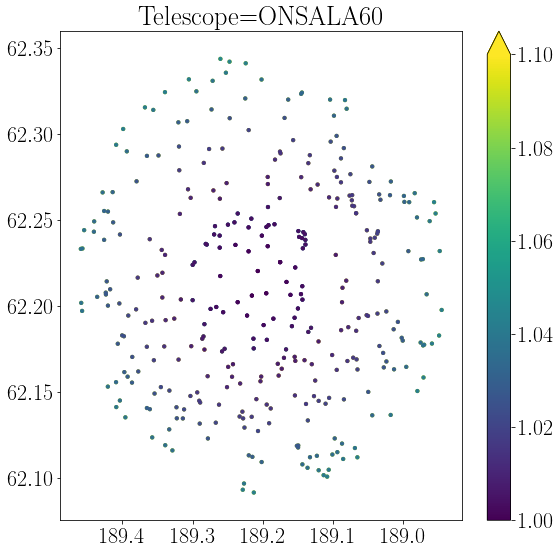

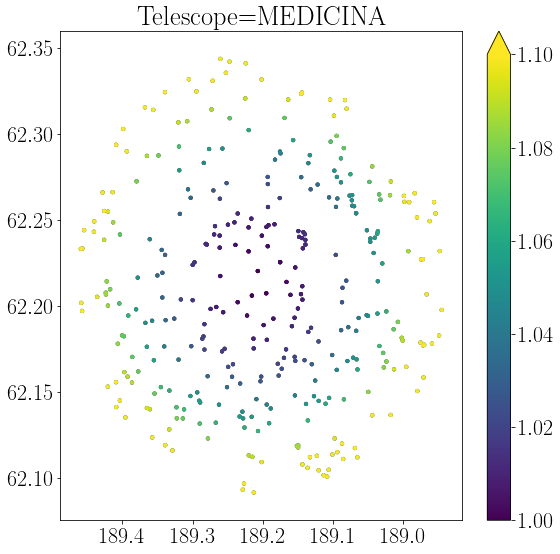

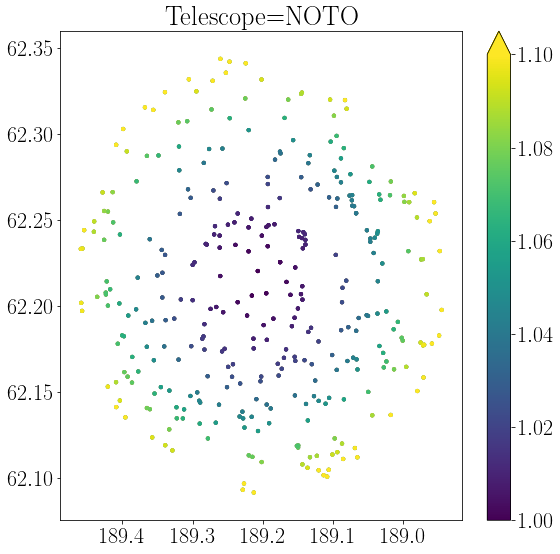

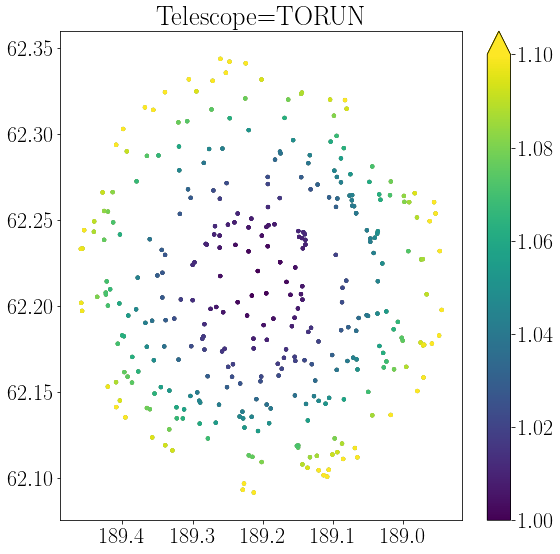

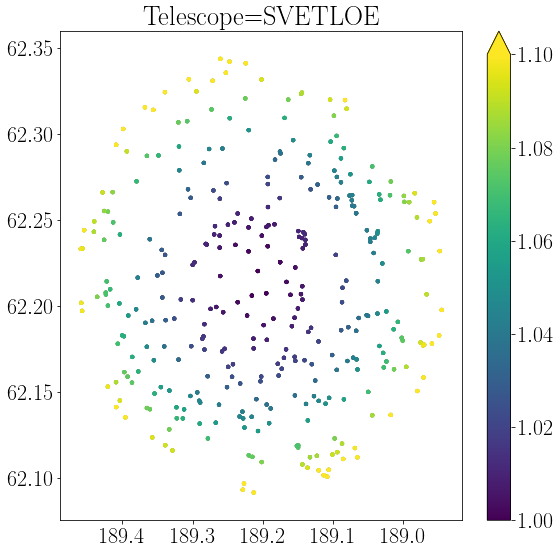

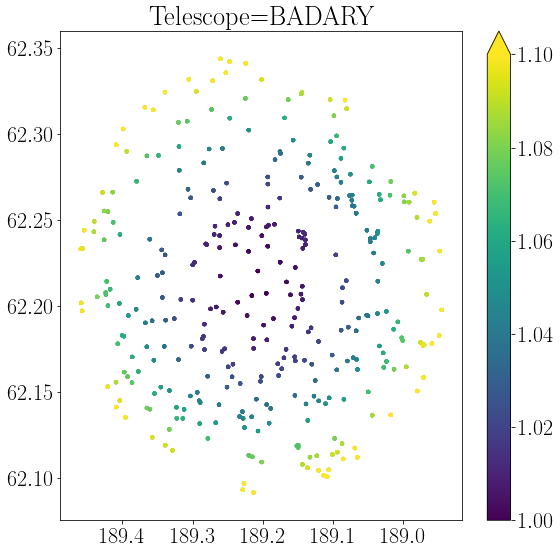

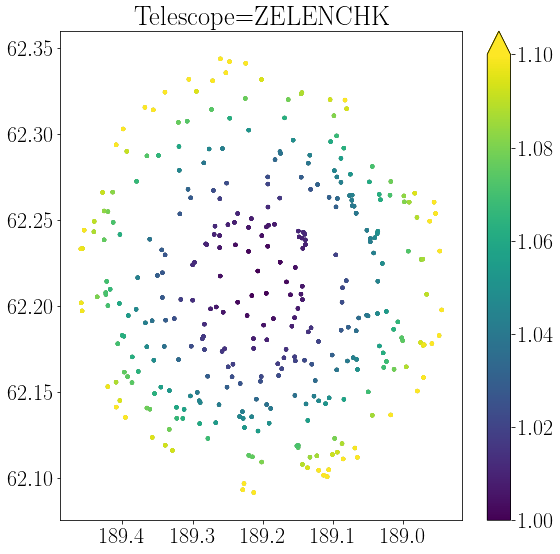

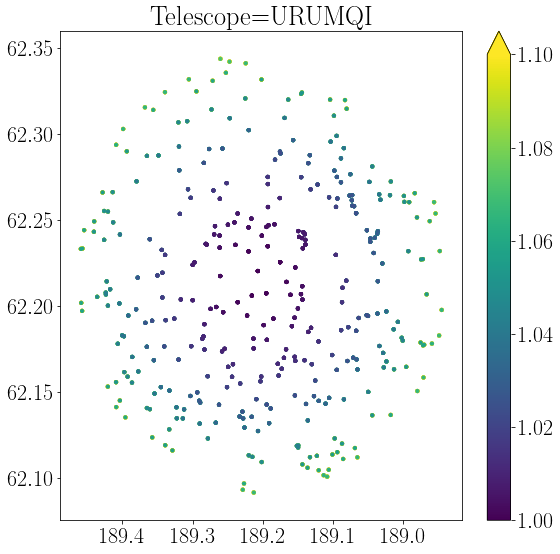

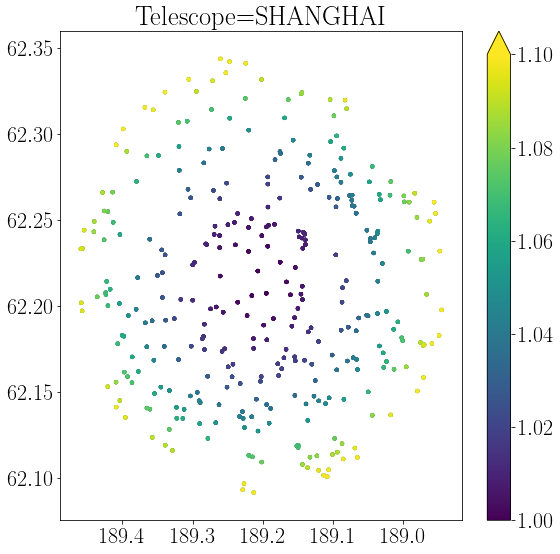

In [32]:
x_central = np.load(open('central_pointing_params.pckl','rb+'))
## Inputs
telescope_index = np.linspace(0,len(x_central[0][3])-1,len(x_central[0][3]))
telescope_name = ['WSTRBORK','ROBLEDO','ONSALA60','MEDICINA','NOTO','TORUN',\
              'SVETLOE','BADARY','ZELENCHK','URUMQI','SHANGHAI']
RA = []
Dec = []
telescope_corr = []
for k in telescope_index:
    k = int(k)
    for i in range(len(x_central)):
        if x_central[i][0].startswith('HDFC'):
            if float(x[i][1]) > 360:
                    RA = RA + [float(x_central[i][1]) -360]
            else:
                    RA = RA + [float(x_central[i][1])]
            Dec = Dec + [float(x_central[i][2])]
            telescope_corr = telescope_corr + x_central[i][3][int(k)].values()
            if x_central[i][0].startswith('HDFC0153'):
                    HDFC0153central_corr = x_central[i][3]
    fig, ax = plt.subplots()
    plt.gca().invert_xaxis()
    scat = ax.scatter(RA, Dec, c=telescope_corr, s=10,vmin=1,vmax=1.1)
    plt.title(r'Telescope=%s' % (telescope_name[k]))
    plt.colorbar(scat,extend='max')
    plt.xlabel(r'R.A. [$^\circ$]')
    plt.ylabel(r'Dec. [$^\circ$]')
    plt.savefig(r'Telescope_%s' % (telescope_name[k]), bbox_inches='tight')
    plt.show()


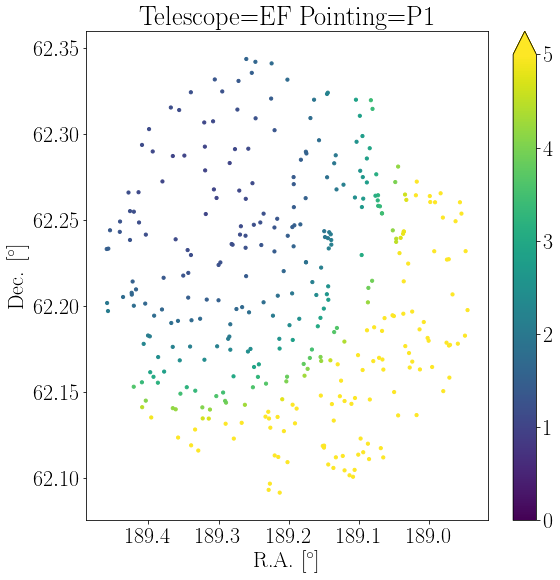

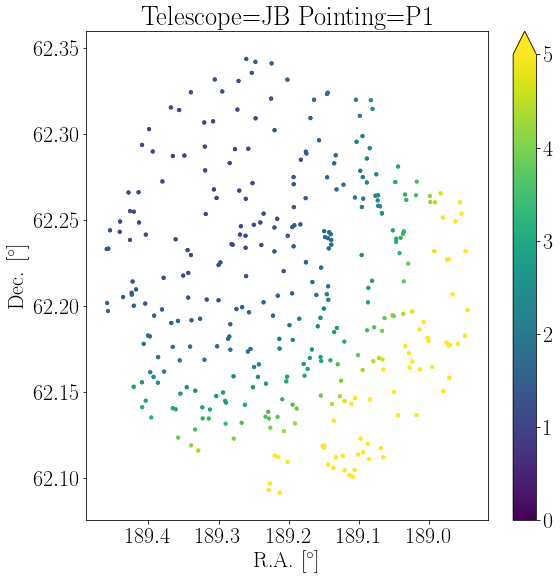

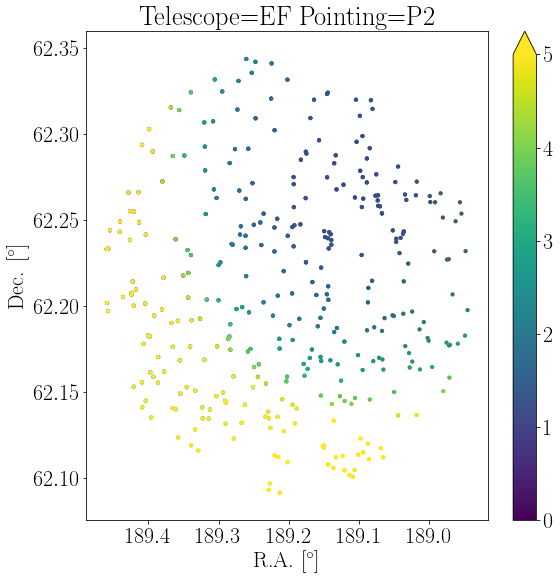

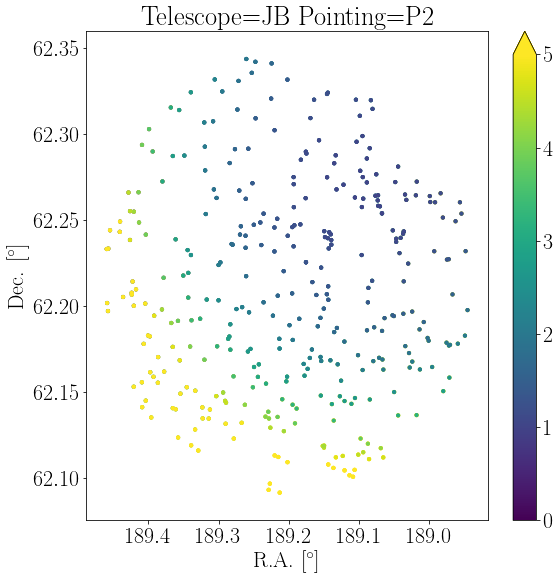

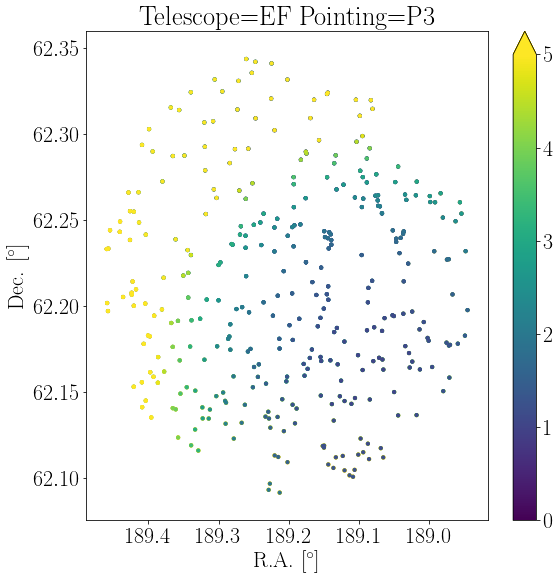

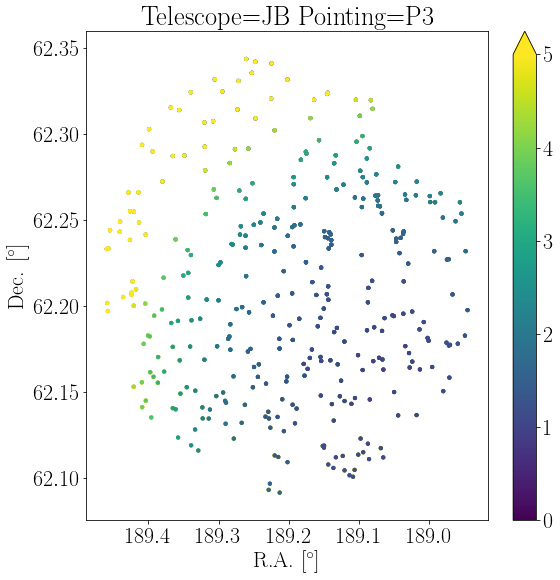

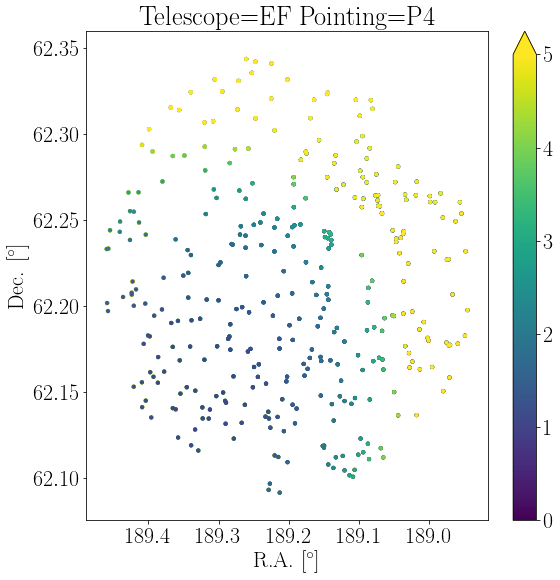

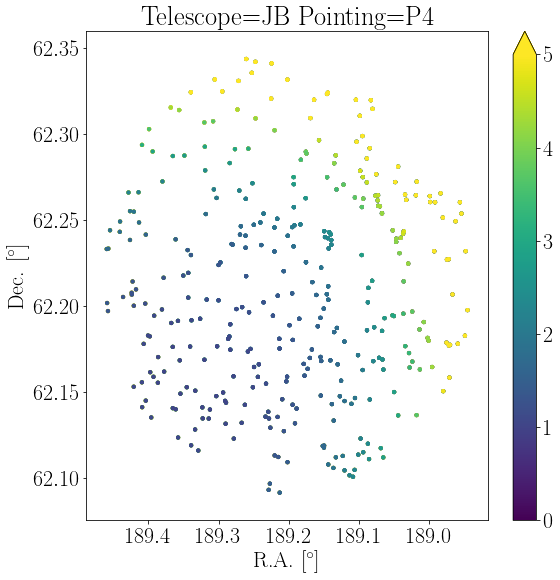

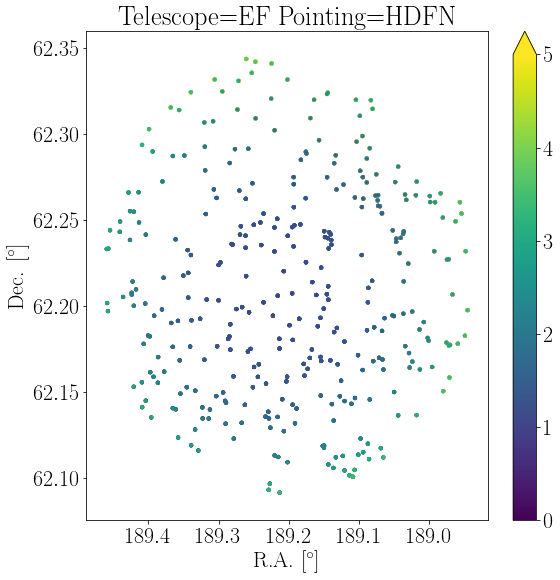

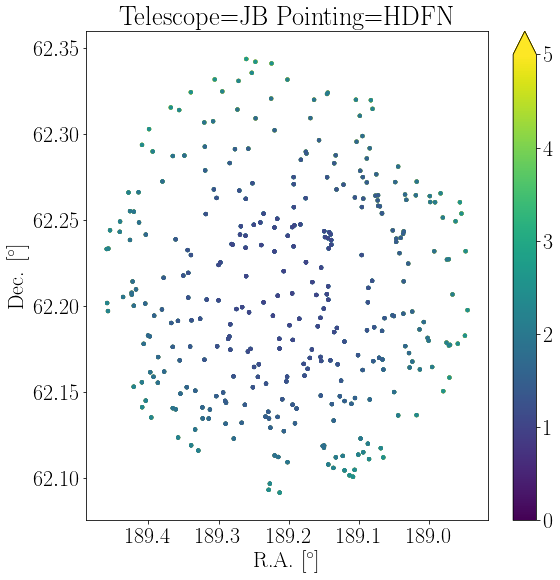

In [36]:
x_outside = np.load(open('outside_pointing_params.pckl','rb+'))
#print x['P1']
## Inputs
Pointing = ['P1','P2','P3','P4','HDFN']
telescope_index = [0,1]
telescope_name = ['EF','JB']


RA = []
Dec = []
telescope_corr = []
HDFC0153outside_corr = []
for j in Pointing:
    x = x_outside[j]
    for k in telescope_index:
        for i in range(len(x)):
            if x[i][0].startswith('HDFC'):
                if float(x[i][1]) > 360:
                    RA = RA + [float(x[i][1]) -360]
                else:
                    RA = RA + [float(x[i][1])]
                
                Dec = Dec + [float(x[i][2])]
                telescope_corr = telescope_corr + x[i][3][k].values()
                if x[i][0].startswith('HDFC0153'):
                    HDFC0153outside_corr = HDFC0153outside_corr + [x[i][3]]
        fig, ax = plt.subplots()
        plt.gca().invert_xaxis()
        scat = ax.scatter(RA, Dec, c=telescope_corr, s=10,vmin=0, vmax=5)
        plt.title(r'Telescope=%s Pointing=%s' % (telescope_name[k],j))
        plt.colorbar(scat,extend='max')
        plt.xlabel(r'R.A. [$^\circ$]')
        plt.ylabel(r'Dec. [$^\circ$]')
        plt.savefig(r'Telescope_%s_Pointing_%s' % (telescope_name[k],j), bbox_inches='tight')
        plt.show()


1.66286679022


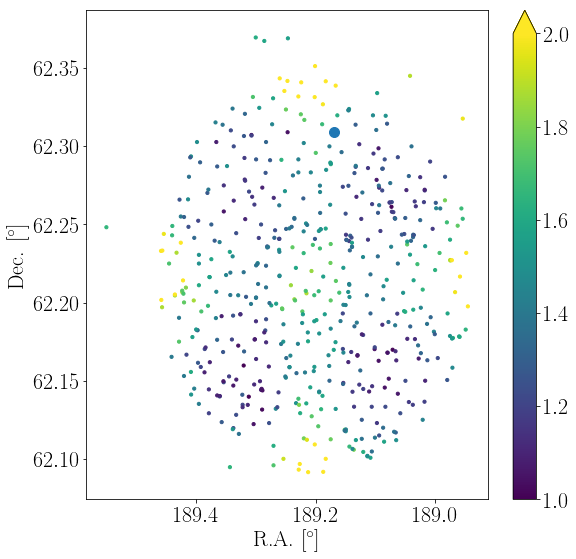

In [37]:
nopbcor = np.load('rms_nopbcor.npy').T
pbcor = np.load('rms_pbcor.npy').T


RA = []
Dec = []
nopbcor_rms = []
pbcor_rms = []
for i in range(len(nopbcor)):
    x = np.where(pbcor==nopbcor[i][0][:8]+'_PBCOR_NA_IM.fits')[0]
    if x:
        if nopbcor[i][0][:8] == 'HDFC0153':
            HDFC0153RA = float(nopbcor[i][1])
            HDFC0153Dec = float(nopbcor[i][2])
            print float(pbcor[x[0]][3])/float(nopbcor[i][3])
        RA = RA + [float(nopbcor[i][1])]
        Dec = Dec + [float(nopbcor[i][2])]
        nopbcor_rms = nopbcor_rms + [float(nopbcor[i][3])]
        pbcor_rms = pbcor_rms + [float(pbcor[x[0]][3])]
    
fig, ax = plt.subplots()
plt.gca().invert_xaxis()
scat = ax.scatter(RA, Dec, c=np.array(pbcor_rms)/np.array(nopbcor_rms), s=10,vmin=1,vmax=2)
HDFC0153_pos = ax.scatter(HDFC0153RA, HDFC0153Dec, s=100)
plt.colorbar(scat,extend='max')
plt.xlabel(r'R.A. [$^\circ$]')
plt.ylabel(r'Dec. [$^\circ$]')
plt.savefig(r'RMS_diff', bbox_inches='tight')
plt.show()

In [35]:
print HDFC0153central_corr
print HDFC0153outside_corr

[{2: 1.0377866049041611}, {3: 1.3374796923872967}, {4: 1.0240216977741354}, {5: 1.075404375498872}, {6: 1.0626529368269244}, {7: 1.0626529368269244}, {8: 1.0626529368269244}, {9: 1.0626529368269244}, {10: 1.0626529368269244}, {11: 1.0377866049041611}, {12: 1.0606525912633809}]
[[{1: 1.740757108704005}, {13: 1.5053085292180224}], [{1: 1.740757108704005}, {13: 1.5053085292180224}], [{1: 1.2460384126741435}, {13: 1.1762147453588807}], [{1: 1.2460384126741435}, {13: 1.1762147453588807}], [{1: 6.8807059653881684}, {13: 4.149889922309427}], [{1: 6.8807059653881684}, {13: 4.149889922309427}], [{1: 9.6375456224348248}, {13: 5.3211659269166525}], [{1: 9.6375456224348248}, {13: 5.3211659269166525}], [{1: 2.0292358287384289}, {13: 1.6856262671785045}], [{1: 2.0292358287384289}, {13: 1.6856262671785045}]]
